In [1]:
import platform
print(platform.python_version())

3.6.3


# DBSCAN (밀도 기반 클러스터링) 테스트
- 출처: http://bcho.tistory.com/1205?category=555440 [조대협의 블로그]

- 밀도 기반의 클러스터링은 점이 세밀하게 몰려있어서 밀도가 높은 부분을 클러스터링 하는 방식이다.

- 데이터프레임 형태 구성

In [4]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [7]:
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.shape

(150, 5)

- 독립변수 저장

In [9]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
feature.shape

(150, 4)

In [11]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

- Create Model and Prediction

In [12]:
model = DBSCAN(min_samples = 6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

In [13]:
predict

,predict
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


- concatenate labels to df as a new column

In [14]:
r = pd.concat([feature,predict], axis=1)

In [16]:
r

,Sepal length,Sepal width,Petal length,Petal width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


- 다음은 모델을 선언하고, 데이타를 넣어서 학습을 시킨다. <br>
학습이 끝난 결과를 다음과 같이 3차원 그래프로 시각화 해보자. 아래 시각화는 3차원인데, 학습은 4차원으로 하였다. <br>
그래서 다소 오류가 있어 보일 수 있다. 다차원 데이터를 시각화 하기 위해서는 PCA나 t-SNE와 같은 차원감소(Dimensional Reduction) 기법을 <br>
사용해야 하는데, 이는 다음 긍에서 다루도록 한다.


- 다음 jupyter notebook에서 차원감소 작업하자.

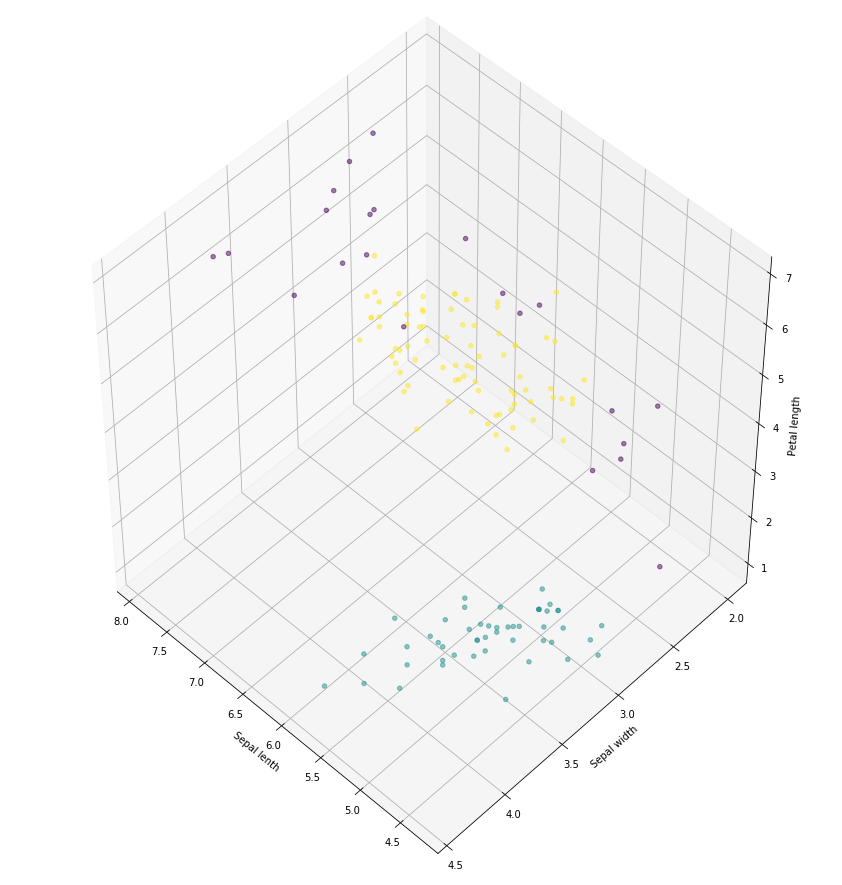

In [18]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(12,12))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

- 마지막으로 Cross tabulazation을 이용하여 모델을 검증해보면 다음과 같은 결과를 얻을 수 있다. 

In [20]:
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
r.head()

,Sepal length,Sepal width,Petal length,Petal width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
ct = pd.crosstab(data['labels'],r['predict'])
ct

predict,-1,0,1
labels,,,
0,1,49,0
1,6,0,44
2,15,0,35


----

# K-means
- 출처: http://bcho.tistory.com/1203?category=555440 [조대협의 블로그]

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [2]:
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)
feature = data[ ['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns


# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']


In [4]:
# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

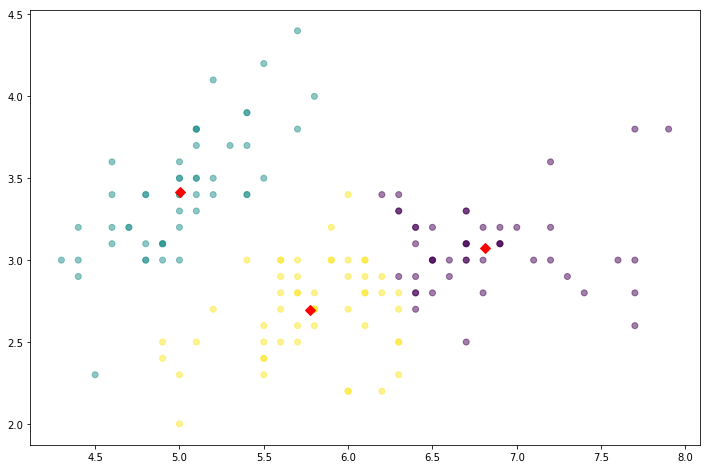

In [5]:
fig = plt.figure( figsize=(12,8))
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)

centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [6]:
model.cluster_centers_

array([[ 6.81276596,  3.07446809],
       [ 5.006     ,  3.418     ],
       [ 5.77358491,  2.69245283]])

### 표준화 이후 K-means

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)

In [10]:
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))

#### Inertia value를 이용한 적정 군집수 판단

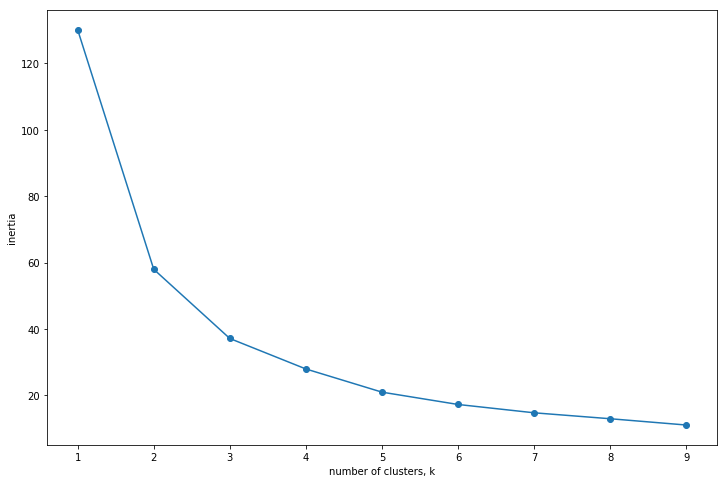

In [13]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)

# Plot ks vs inertias
fig = plt.figure( figsize=(12,8))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Hierarchical Clustering
- 출처: http://bcho.tistory.com/1204?category=555440 [조대협의 블로그]

- 비슷한 군집끼리 묶어가면서 최종적으로는 하나의 케이스가 될때까지 군집을 묶는 클러스터링 알고리즘이다.

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [2]:
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

- dendrogram을 그려보면? 

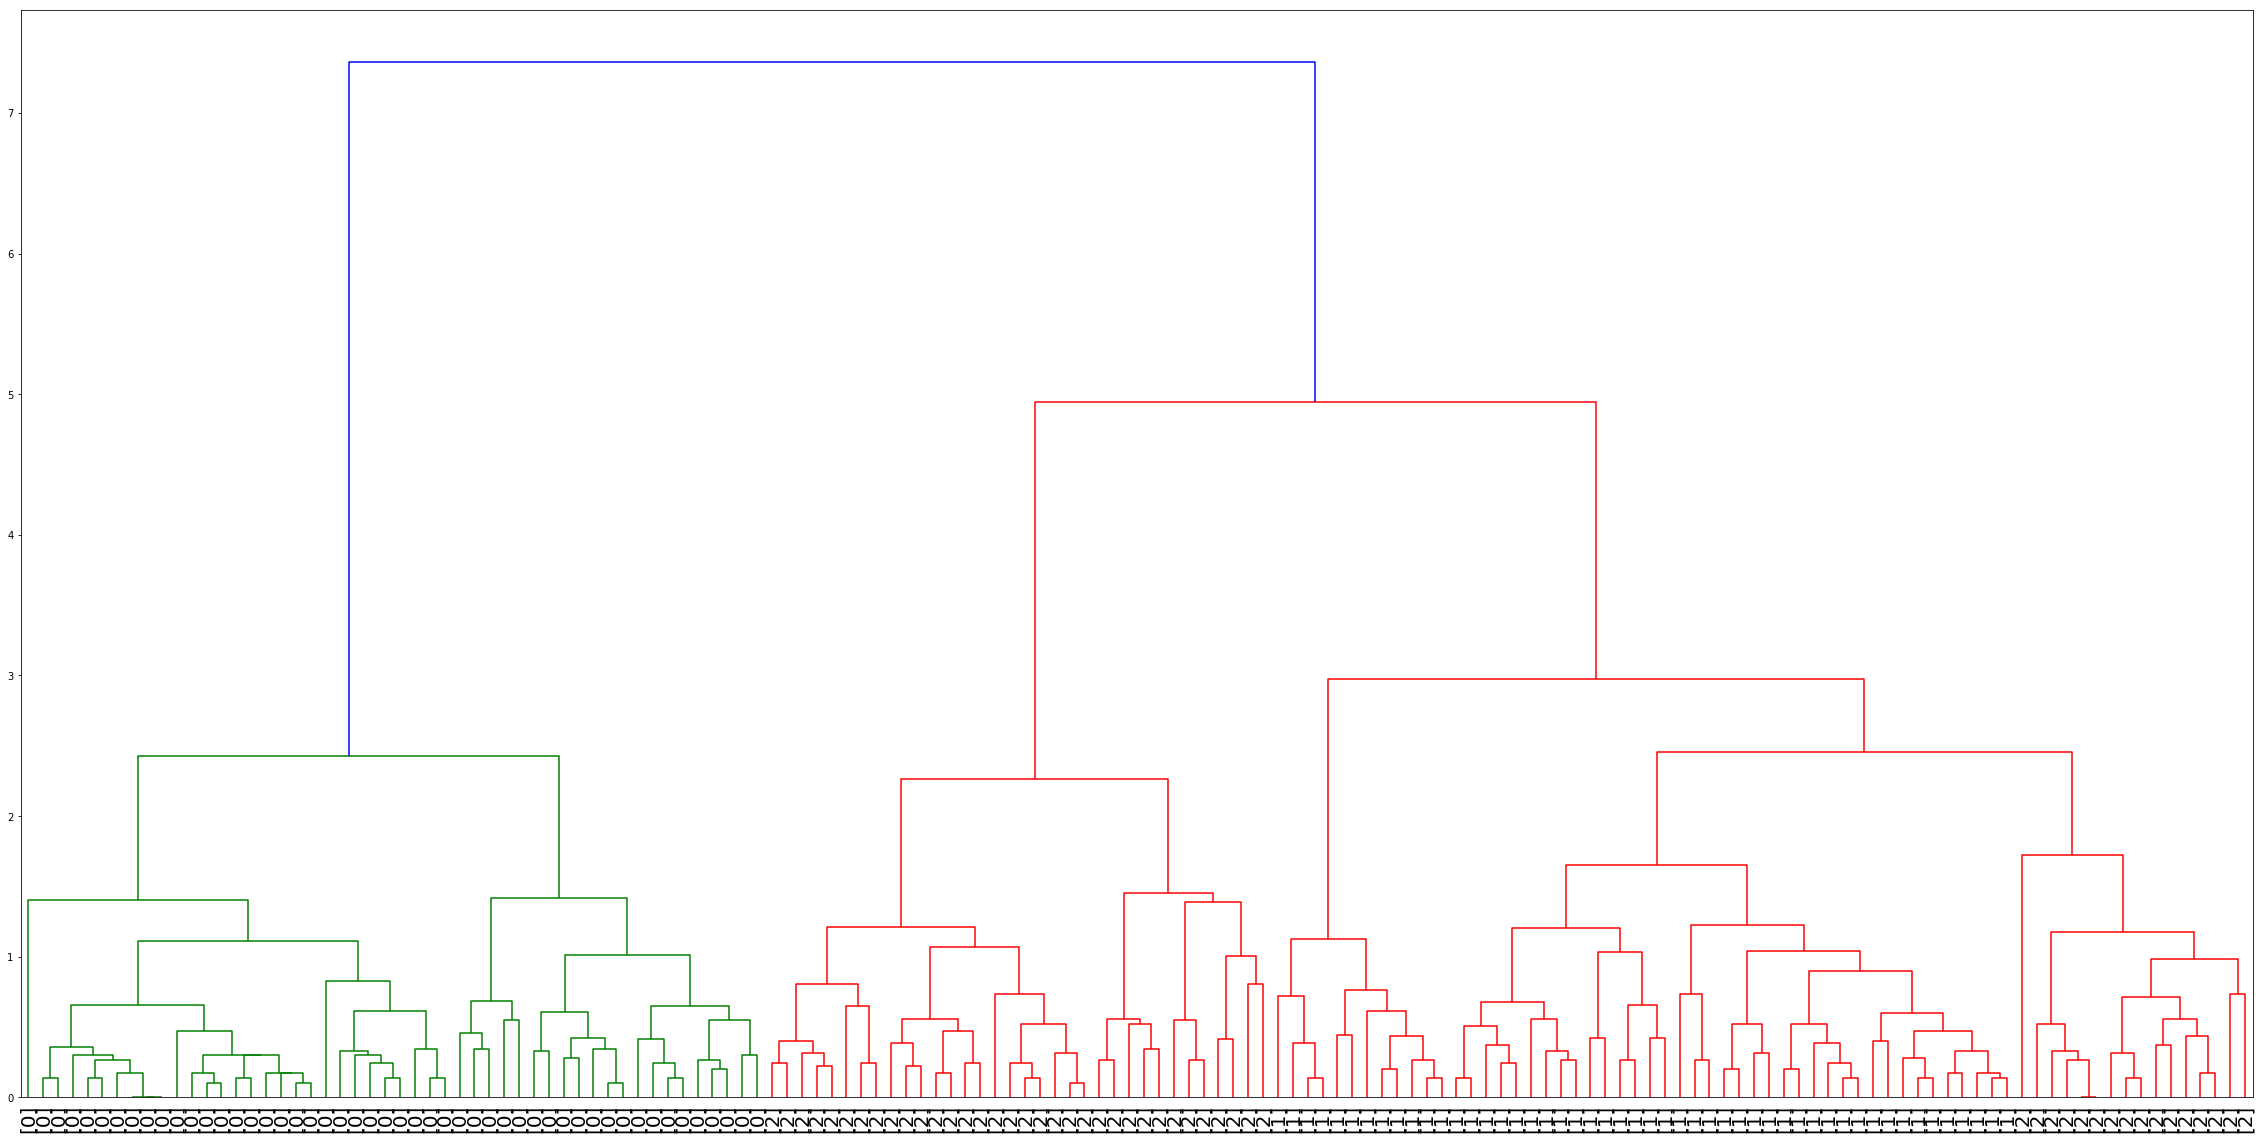

In [5]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()


- linkage 함수 option으로 3가지가 있다. 
    - complete linkage 방식, 두 클러스터상에서 가장 먼 거리를 이용해서 측정하는 방식
    - single linkage 방식, 두 클러스터에서 가장 가까운 거리를 사용하는 방식
    - average linkage 방식, 각 클러스터내의 각 정에서 다른 클러스터내의 모든 점사이의 거리에 대한 평균을 사용하는 방식

### 계층 분석을 통한 군집의 결정 
- 계층 분석은 최종적으로 1개의 군집으로 모든 데이터를 클러스터링 하는데, 그렇다면 n개의 군집으로 나누려면 어떻게 해야하는가?<br>
dendrogram의 y축이 각 클러스터간의 거리를 나타내는데, 위로 올라갈수록 클러스터가 병합되는 것을 볼 수 있다. <br>

<img src="picture/계층분석 군집 선택.png" />

즉, 적정 y값에서 클러스터링을 멈추면 n개의 군집까지만 클러스터링이 되는데, 위의 그림은 y값을 3에서 클러스터링을 멈춰서 총 3개의 클러스터로 구분을 한 결과이다.<br>
이렇게 계층형 분석에서 sklearn을 사용할 경우 fcluster함수를 이용하면, 특정 y값에서 클러스터링을 멈출 수 있다. 다음 코드를 보자.

In [6]:
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(mergings,3,criterion='distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)


labels    0   1   2
predict            
1        50   0   0
2         0   0  34
3         0  50  16


예측값 추출 후<br>예측값과 실제값을 비교함. 

# AgglomerativeClustering
- 출처: https://frhyme.github.io/python-lib/clustering_in_python/

- K-means의 경우 처음에 몇 개로 나눌지에 따라서 클러스터링 된 결과가 달라지는데, Agglomerative Clustering은 그렇지 않는다. 가장 가까운 node pair를 찾고, 다시 그 node pair 그룹에서 가장 가까운 node를 찾는식으로 반복하여 dendrogram을 그려줍니다. 따라서, dendrogram을 보고, 적당한 clustering_num을 찾아서 넣어주면 됩니다,?! 

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import networkx as nx

In [4]:
G = nx.karate_club_graph() # non weight degree 
feature = nx.adj_matrix(G).toarray()

In [5]:
G

In [6]:
feature

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ..., 
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int32)

In [7]:
feature.shape

(34, 34)

In [32]:

type(feature)

numpy.ndarray

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


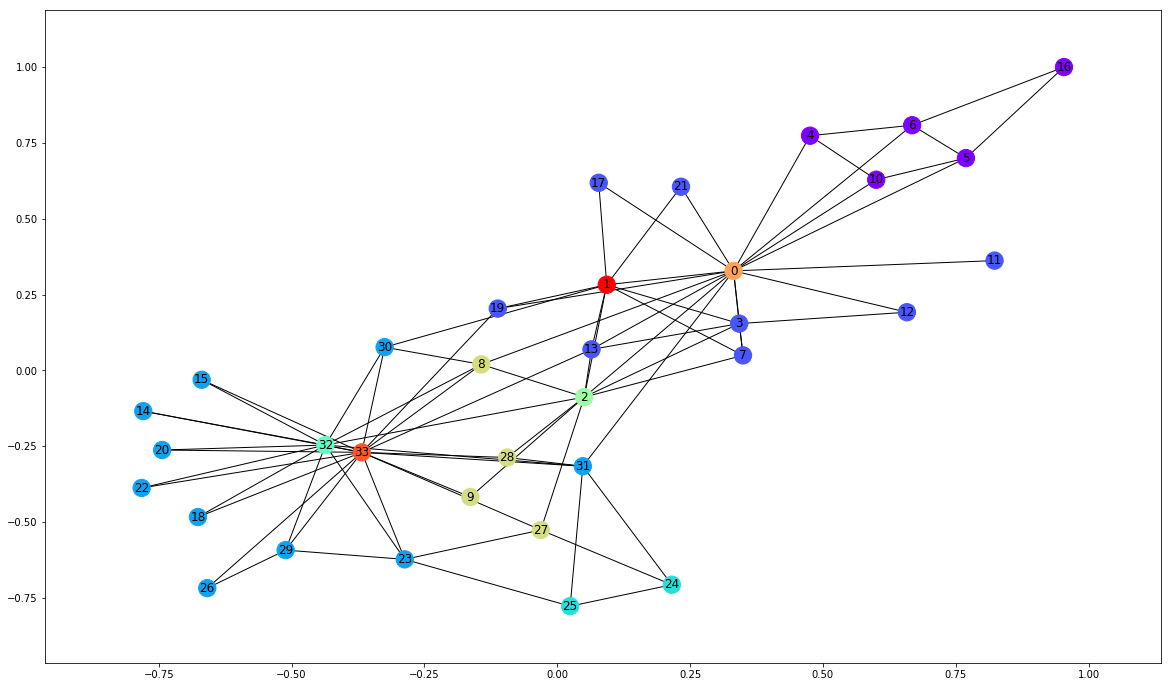

In [40]:
plt.figure(figsize=(20, 12))
nx.draw_networkx(G, nx.spring_layout(G),
    node_color=AgglomerativeClustering(n_clusters=10).fit_predict(feature),
                 cmap=plt.cm.rainbow
)
# plt.axis('off')

- 그릴때마다 다르지만, 군집수는 동일함,,
- 실전에서 활용하기 애매하겠다...